In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vivek468/superstore-dataset-final")

print("Path to dataset files:", path)

100%|██████████| 550k/550k [00:00<00:00, 73.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vivek468/superstore-dataset-final/versions/1


In [ ]:
import os

folder_path = '/root/.cache/kagglehub/datasets/vivek468/superstore-dataset-final/versions/1'

# Listar todos os arquivos disponíveis na pasta
for file in os.listdir(folder_path):
    print(file)


Sample - Superstore.csv


In [ ]:
import pandas as pd

file_path = '/root/.cache/kagglehub/datasets/vivek468/superstore-dataset-final/versions/1/Sample - Superstore.xls'

df = pd.read_excel(file_path)
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/kagglehub/datasets/vivek468/superstore-dataset-final/versions/1/Sample - Superstore.xls'

In [ ]:
import os

folder_path = '/root/.cache/kagglehub/datasets/vivek468/superstore-dataset-final/versions/1'

# Ver todos os arquivos e subpastas
for root, dirs, files in os.walk(folder_path):
    for file in files:
        print(os.path.join(root, file))


/root/.cache/kagglehub/datasets/vivek468/superstore-dataset-final/versions/1/Sample - Superstore.csv


In [ ]:
import pandas as pd

file_path = '/root/.cache/kagglehub/datasets/vivek468/superstore-dataset-final/versions/1/Sample - Superstore.csv'

df = pd.read_csv(file_path, encoding='ISO-8859-1')
df.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


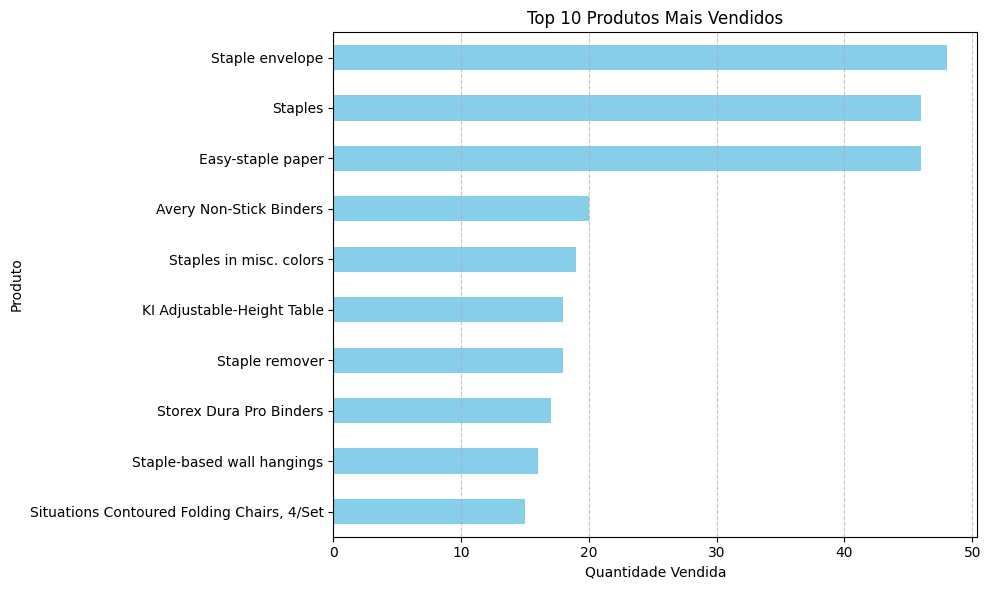

In [ ]:
import matplotlib.pyplot as plt

# Contar os produtos mais vendidos
top_produtos = df['Product Name'].value_counts().head(10)

# Plotar gráfico de barras horizontais
plt.figure(figsize=(10,6))
top_produtos.plot(kind='barh', color='skyblue')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto')
plt.gca().invert_yaxis()  # Produto mais vendido no topo
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


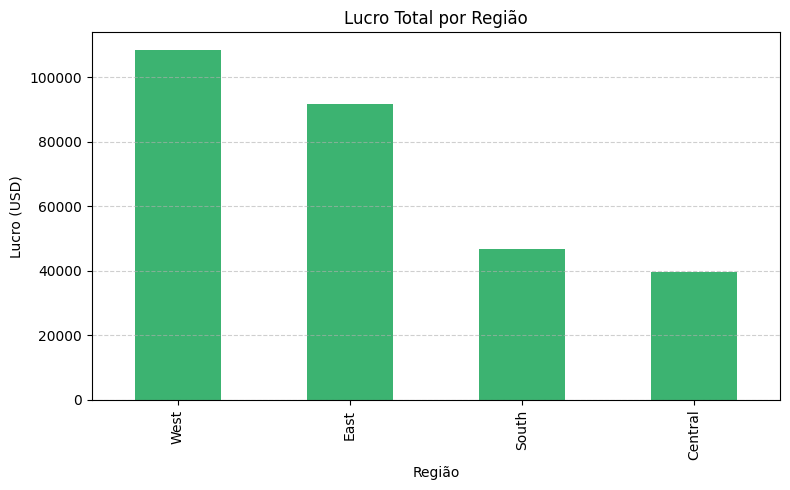

In [ ]:
# Lucro por região
lucro_regiao = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(8,5))
lucro_regiao.plot(kind='bar', color='mediumseagreen')
plt.title('Lucro Total por Região')
plt.ylabel('Lucro (USD)')
plt.xlabel('Região')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
# Produto mais vendido por frequência (quantidade de vezes vendido)
produto_mais_vendido = df['Product Name'].value_counts().head(1)
print("Produto mais vendido:\n", produto_mais_vendido)


Produto mais vendido:
 Product Name
Staple envelope    48
Name: count, dtype: int64


<ipython-input-10-c9c53335ed92>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['AnoMes'] = df_top['Order Date'].dt.to_period('M').astype(str)


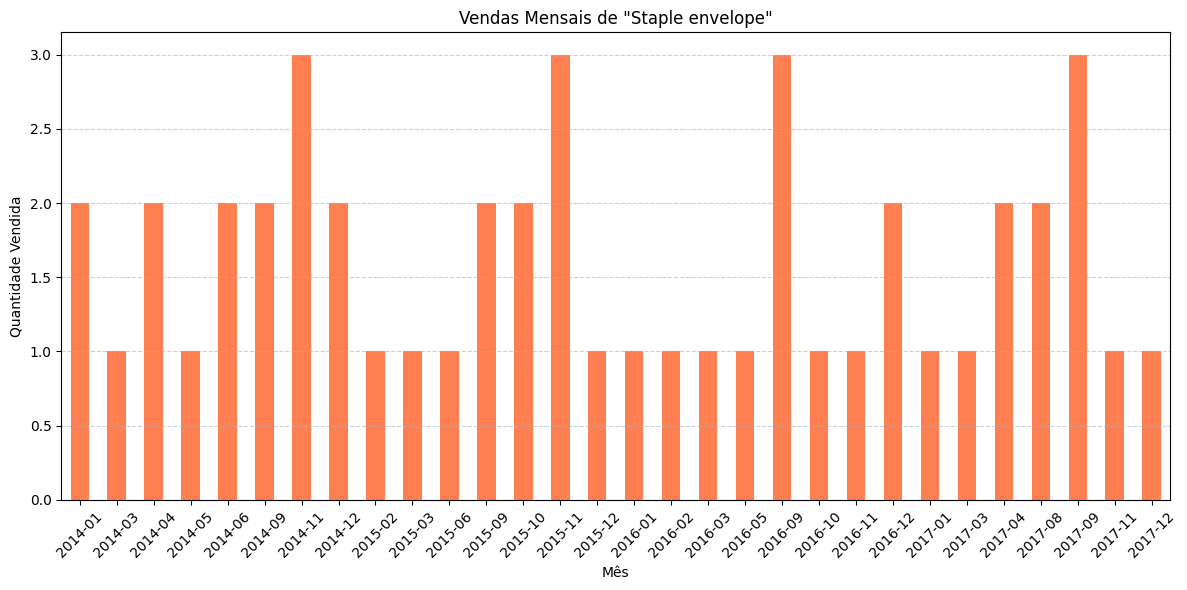

In [ ]:
# Garantir que a coluna de datas esteja como datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Produto mais vendido (nome)
produto_top = df['Product Name'].value_counts().idxmax()

# Filtrar vendas só desse produto
df_top = df[df['Product Name'] == produto_top]

# Criar coluna com mês e ano
df_top['AnoMes'] = df_top['Order Date'].dt.to_period('M').astype(str)

# Agrupar por mês
vendas_por_mes = df_top.groupby('AnoMes').size()

# Gráfico
plt.figure(figsize=(12,6))
vendas_por_mes.plot(kind='bar', color='coral')
plt.title(f'Vendas Mensais de "{produto_top}"')
plt.xlabel('Mês')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
